# Explore holography imageset
This example shows how to display data which are saved in h5 file
Using the Imageset class representing one particlular imageset

## Import libraries

In [1]:
from align_panel.imgsetlib import Imgset
import matplotlib.pyplot as plt
from skimage import transform as sktransform
import numpy as np
import ast
import yaml

# Set datapaht to the h5 data file
and create an object of Imgset from the h5 file '-4-H'

In [3]:
datapath = 'holography.h5'
imgset1 = Imgset(datapath,'positive')

# Get list of all data saved in file for this imageset:

In [4]:
content = imgset1.get_content()
print(">>> content of the imageset:\n"+ str(content)+"\n")

>>> content of the imageset:
['amplitude', 'img', 'img_metadata', 'img_metadataoriginal', 'phase', 'ref', 'ref_metadata', 'ref_metadataoriginal', 'unwrapped_phase']



# Print metadata of image

In [5]:
print(">>> image metadata:")
metadata_str = imgset1.get_data('img_metadata') #metadata are stored as string
metadata_dict = ast.literal_eval(metadata_str) # convert them into dictionary
metadata_prettyprint = yaml.dump(metadata_dict, default_flow_style=False) # make indentation to apear more beautifull
print(metadata_prettyprint)

print(">>> image metadata original:")
metadataoriginal = imgset1.get_data('img_metadataoriginal') #metadata are stored as string
print(metadataoriginal)

>>> image metadata:
Acquisition_instrument:
  TEM:
    Camera:
      exposure: 0.09984000249600006
    acquisition_mode: TEM
    beam_current: 0.0
    beam_energy: 300.0
    magnification: 500000.0
    microscope: Hitachi HF3300 v1.06
General:
  FileIO:
    '0':
      hyperspy_version: 1.7.3
      io_plugin: hyperspy.io_plugins.digital_micrograph
      operation: load
      timestamp: '2023-03-28T10:20:50.731099+02:00'
  date: '2023-02-08'
  original_filename: Z1_H.dm4
  time: '11:39:14'
  title: Z1_H
Signal:
  Noise_properties:
    Variance_linear_model:
      gain_factor: 1.0
      gain_offset: 0.0
  quantity: Intensity
  signal_type: hologram
_HyperSpy:
  Folding:
    original_axes_manager: null
    original_shape: null
    signal_unfolded: false
    unfolded: false

>>> image metadata original:
{'root': {}, 'ApplicationBounds': (0, 0, 1503, 2971), 'DocumentObjectList': {'TagGroup0': {'AnnotationGroupList': {}, 'AnnotationType': 20, 'BackgroundColor': (-1, -1, -1), 'BackgroundMode':

# load images:

In [6]:
imgname = 'unwrapped_phase'
img_stat = imgset1.get_data(imgname,stat=True)
img_move = imgset1.get_data(imgname,stat=False)

# plot some images

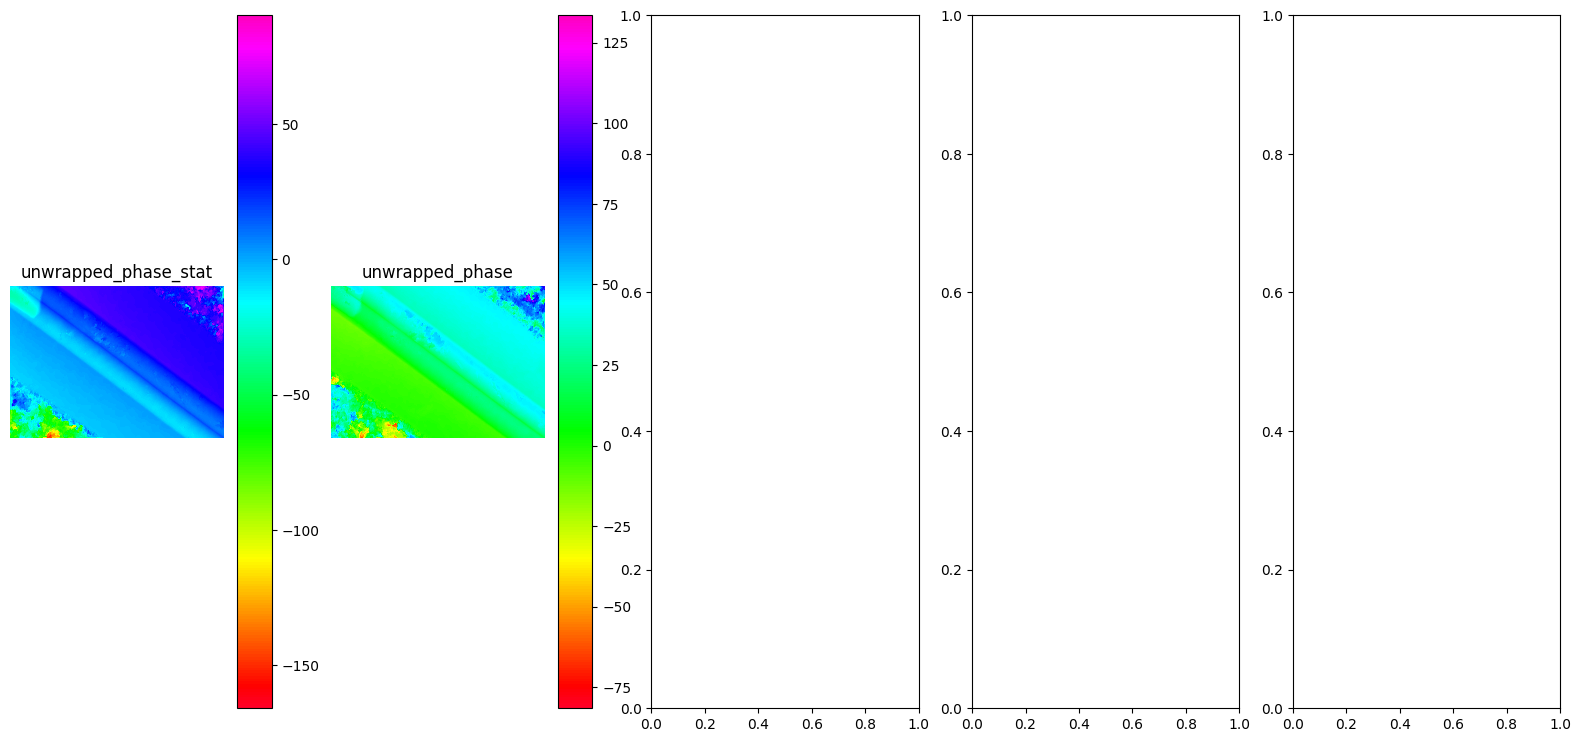

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(20, 9))

im0 = ax[0].imshow(img_stat, cmap='gist_rainbow')
ax[0].set_title(imgname + '_stat')
ax[0].axis('off')
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(img_move, cmap='gist_rainbow')
ax[1].set_title(imgname)
ax[1].axis('off')
fig.colorbar(im1, ax=ax[1])

# We chack if there is a transformation matrix already

In [8]:
try:
    tmat = imgset1.get_data('tmat') # transformation matrix 
    # apply transformation matrix to certain image:
    img_aligned = sktransform.warp(img_move, tmat) 

    
    im2 = ax[2].imshow(img_aligned, cmap='gist_rainbow')
    ax[2].set_title('img_aligned')
    ax[2].axis('off')
    fig.colorbar(im2, ax=ax[2])

    im3 = ax[3].imshow((img_stat + img_aligned)/2, cmap='gist_rainbow')
    ax[3].set_title('sum')
    ax[3].axis('off')
    fig.colorbar(im3, ax=ax[3])

    im4 = ax[4].imshow((img_stat - img_aligned)*2, cmap='gist_rainbow')
    ax[4].set_title('dif')
    ax[4].axis('off')
    fig.colorbar(im4, ax=ax[4])
except:
    print(">>> Probably no transformation matrix present. First, do the alignment.")
    ax[2].set_title('img_aligned - tr. matrix required')
    ax[3].set_title('sum - tr. matrix required')
    ax[4].set_title('dif - tr. matrix required')

plt.show()

>>> Probably no transformation matrix present. First, do the alignment.
